https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [ ]:
# creating self made function for one hot encoding
def category_onehot_multcols(multcolumns):
    df_Final=df_final
    i=0
    for fields in multcolumns:

        print(fields)
        df1=pd.get_dummies(df_final[fields],drop_first=True)

        df_final.drop([fields],axis=1,inplace=True)
        if i==0:
            df_Final=df1.copy()
        else:

            df_Final=pd.concat([df_Final,df1],axis=1)
        i=i+1


    df_Final=pd.concat([df_final,df_Final],axis=1)

    return df_Final


In [ ]:
def model_handler_train(model , X_train , y_train):
  model = model.fit(X_train , y_train)
  prediction = model.predict(X_train)
  meanAbErr = metrics.mean_absolute_error(y_train, prediction)
  meanSqErr = metrics.mean_squared_error(y_train, prediction)
  rootMeanSqErr = np.sqrt(meanSqErr)
  print('R squared: {:.2f}'.format(model.score(X_train,y_train)*100))
  print('Mean Absolute Error:', meanAbErr)
  print('Mean Square Error:', meanSqErr)
  print('Root Mean Square Error:', rootMeanSqErr)
  return model,prediction

In [ ]:
# defining the function for filling outliers with mean value

def mean_func(df):
  for ele in df.columns:
    if df[ele].isna().sum() > 0:
      df[ele] = df[ele].fillna(df[ele].mean())
  return df

In [ ]:
# defining function for object type column for filling value with mode

def obj_func(df):
  for ele in df.columns:
    if df[ele].isna().sum() > 0:
      df[ele] = df[ele].fillna(df[ele].mode()[0])
  return df

In [ ]:
# defining the function for filling median values before handling the outliers

def median_func(df):
  for ele in df.columns:
    if df[ele].isna().sum() > 0:
      df[ele] = df[ele].fillna(df[ele].median())
  return df

In [ ]:
# defining function for NA's columns , If column has NA's more than 30 percent. columns should be dropped

def NA_func(df):
  for ele in df.columns:
    if df[ele].isna().sum() / df.shape[0] * 100 >= 30:
      df.drop(ele, axis = 1 , inplace = True)
  return df

In [ ]:
# defining function for NA's columns, which have NA's greater 0 and less than 30 percent

def NA_col(df):
  col = []
  for ele in df.columns:
    if ((df[ele].isna().sum() / df.shape[0] * 100 > 0) & (df[ele].isna().sum() / df.shape[0] * 100 <= 30)):
      col.append(ele)

In [ ]:
# Defining function for eliminating unique identifiers from the columns

def eliminate_identifier(df):
  for ele in df.columns:
    if df[ele].nunique() == df.shape[0]:
      df.drop(ele, axis = 1, inplace = True)
  return df

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# defining path for file
path = "/content/drive/My Drive/House_Price/"

In [ ]:
# # one time job
# # unzip the file from the defined path
# # importing the zipfile module
# from zipfile import ZipFile

# # loading the temp.zip and creating a zip object
# with ZipFile(path + "house-prices-advanced-regression-techniques (1).zip", 'r') as zObject:

# 	# Extracting all the members of the zip
# 	# into a specific location.
# 	zObject.extractall(
# 		path=path)


In [ ]:
# Showing the required files
import os
os.listdir(path)

['house-prices-advanced-regression-techniques (1).zip',
 'data_description.txt',
 'sample_submission.csv',
 'test.csv',
 'train.csv']

In [ ]:
# Showing all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_train = pd.read_csv(path + "train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [ ]:
df_train.isna().sum() / df_train.shape[0] * 100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [ ]:
# before eliminating NA's
df_train.shape

(1460, 81)

In [ ]:
# after eliminating NA's
df_train = NA_func(df_train)
df_train.shape

(1460, 76)

In [ ]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [ ]:
# showing object columns
df_train.select_dtypes(include = 'object').head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [ ]:
# showing number unique values in the columns
df_train.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [ ]:
df_train.shape

(1460, 76)

In [ ]:
# Id column can be eliminated as it is unique identifier and equal to number of rows in dataframe

df_train = eliminate_identifier(df_train)

In [ ]:
# after eliminating unique identifier
df_train.shape

(1460, 75)

In [ ]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


<Figure size 5000x5000 with 0 Axes>

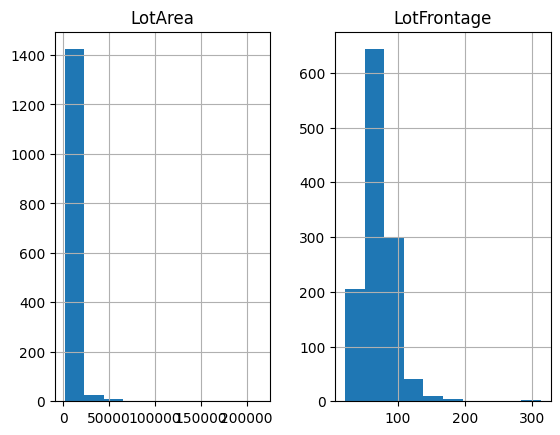

In [ ]:
# visualizing two columns for identifying the outliers in the columns using histogram
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

df_train.hist('LotArea', ax=axes[0]);
df_train.hist('LotFrontage', ax=axes[1]);

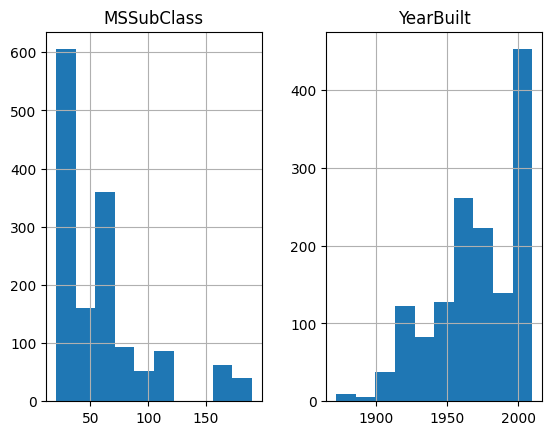

In [ ]:
# visualizing two columns for identifying the outliers in the columns using histogram
fig, axes = plt.subplots(1, 2);

df_train.hist('MSSubClass', ax=axes[0]);
df_train.hist('YearBuilt', ax=axes[1]);

<Figure size 5000x5000 with 0 Axes>

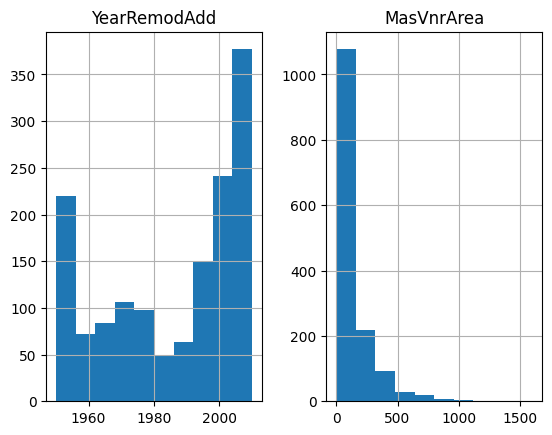

In [ ]:
# visualizing two columns for identifying the outliers in the columns using histogram
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

df_train.hist('YearRemodAdd', ax=axes[0]);
df_train.hist('MasVnrArea', ax=axes[1]);

<Figure size 5000x5000 with 0 Axes>

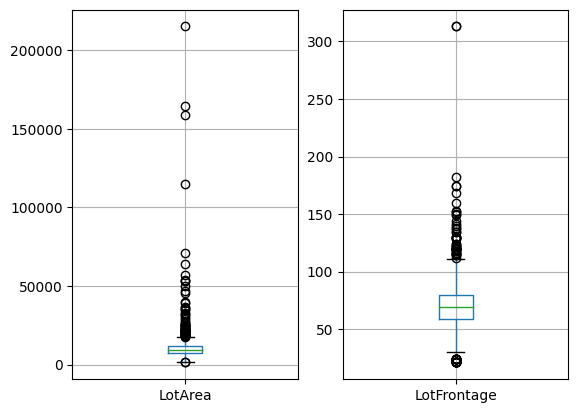

In [ ]:
# visualizing two columns for identifying the outliers in the columns using boxplot
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

df_train.boxplot('LotArea', ax=axes[0]);
df_train.boxplot('LotFrontage', ax=axes[1]);

<Figure size 5000x5000 with 0 Axes>

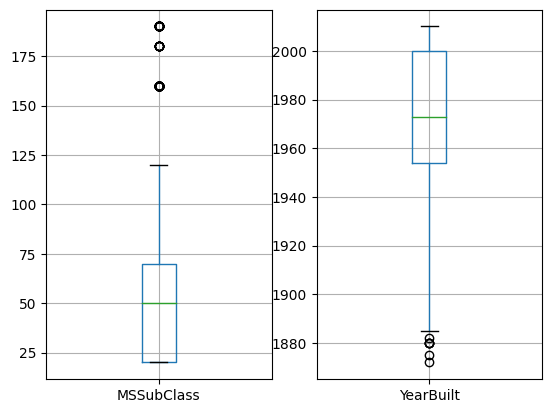

In [ ]:
# visualizing two columns for identifying the outliers in the columns using boxplot
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

df_train.boxplot('MSSubClass', ax=axes[0]);
df_train.boxplot('YearBuilt', ax=axes[1]);

<Figure size 5000x5000 with 0 Axes>

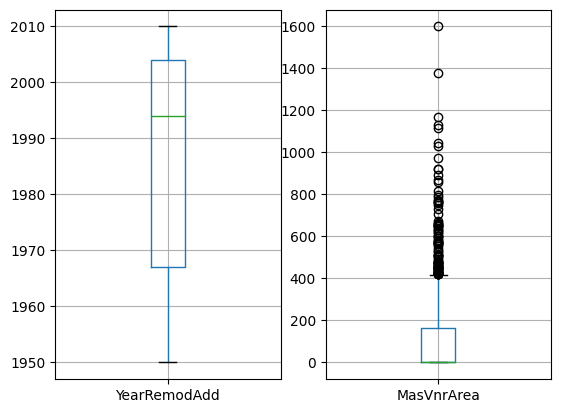

In [ ]:
# visualizing two columns for identifying the outliers in the columns using boxplot
plt.figure(figsize=(50, 50));
fig, axes = plt.subplots(1, 2);

df_train.boxplot('YearRemodAdd', ax=axes[0]);
df_train.boxplot('MasVnrArea', ax=axes[1]);

<ipython-input-33-2e7cf1ec86a0>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(df_train.corr(), cmap="YlGnBu", annot=True);


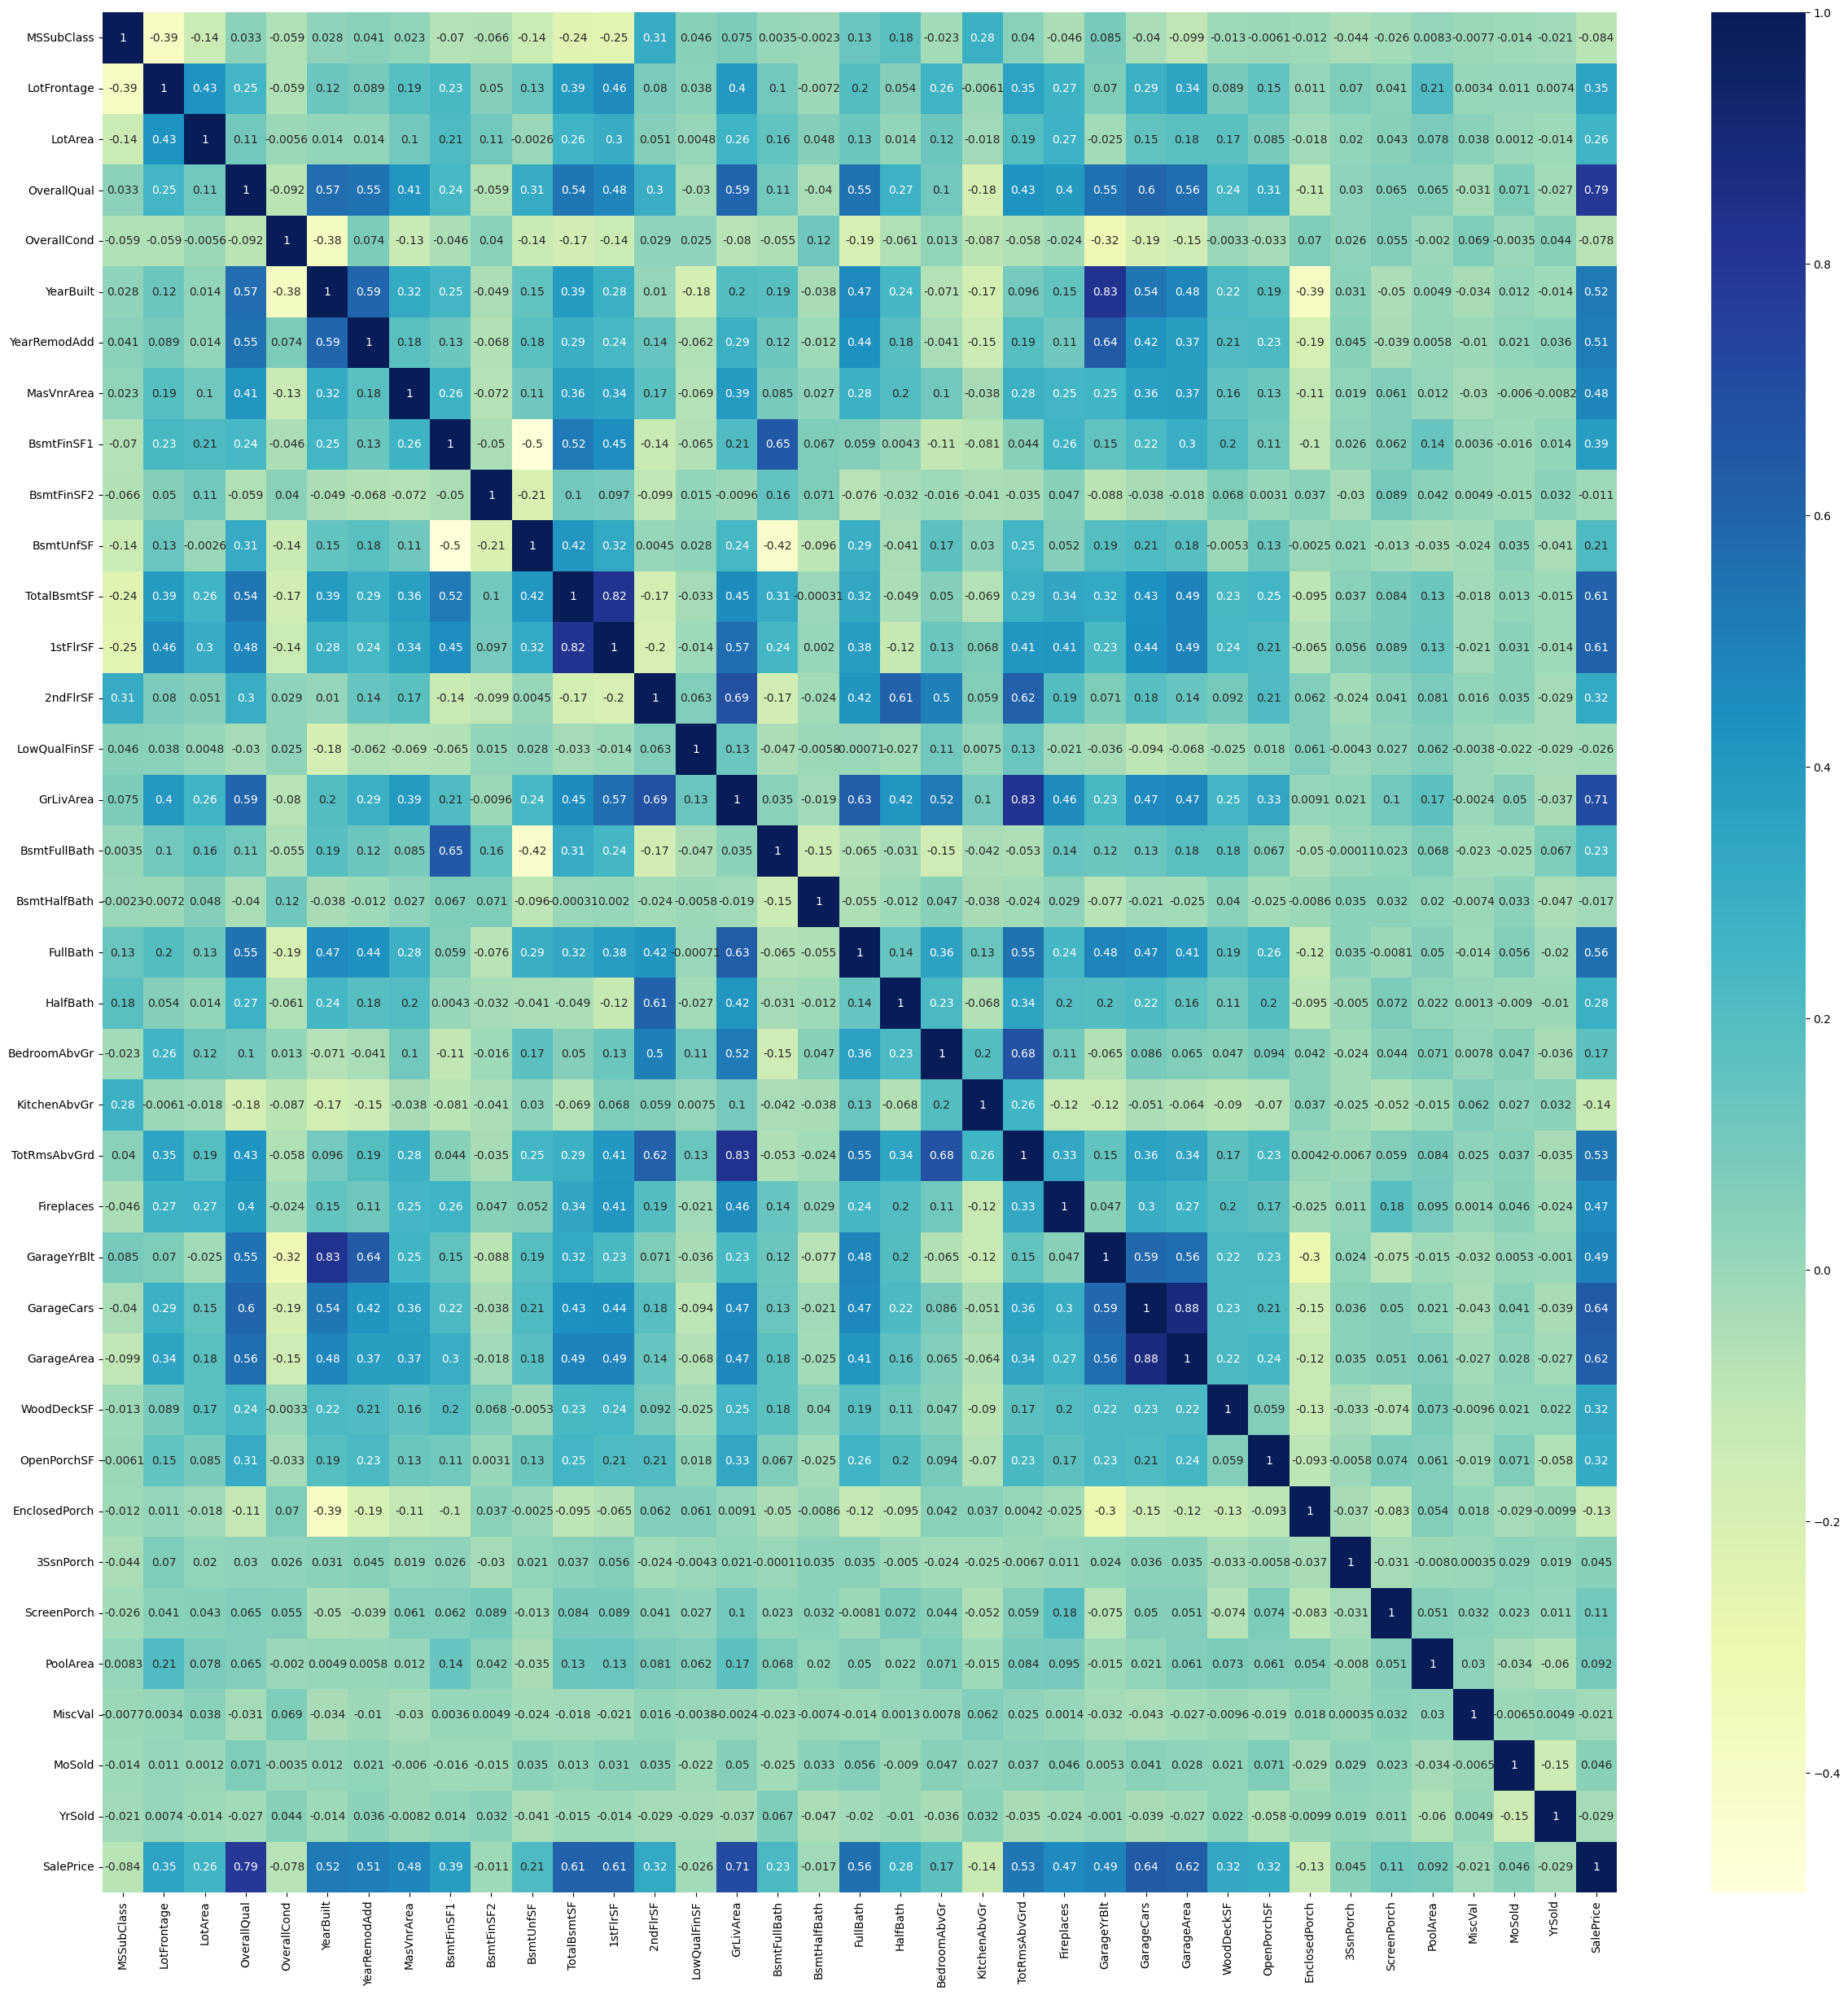

In [ ]:
# plotting correlation heatmap
import seaborn as sb
plt.figure(figsize=(30, 30));
dataplot = sb.heatmap(df_train.corr(), cmap="YlGnBu", annot=True);

# displaying heatmap
plt.show();

In [ ]:
# How to see highly correlated features in dataset

l=[]
corr_matrix = df_train.corr().abs()

for ci in corr_matrix.columns:
    for cj in corr_matrix.columns:
        if (corr_matrix[ci][cj]>0.8 and ci!=cj):
            l.append(ci)



<ipython-input-34-0ff46bd82d78>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr().abs()


In [ ]:
# features that are having correlations above 80 percent
print(l)

['YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea']


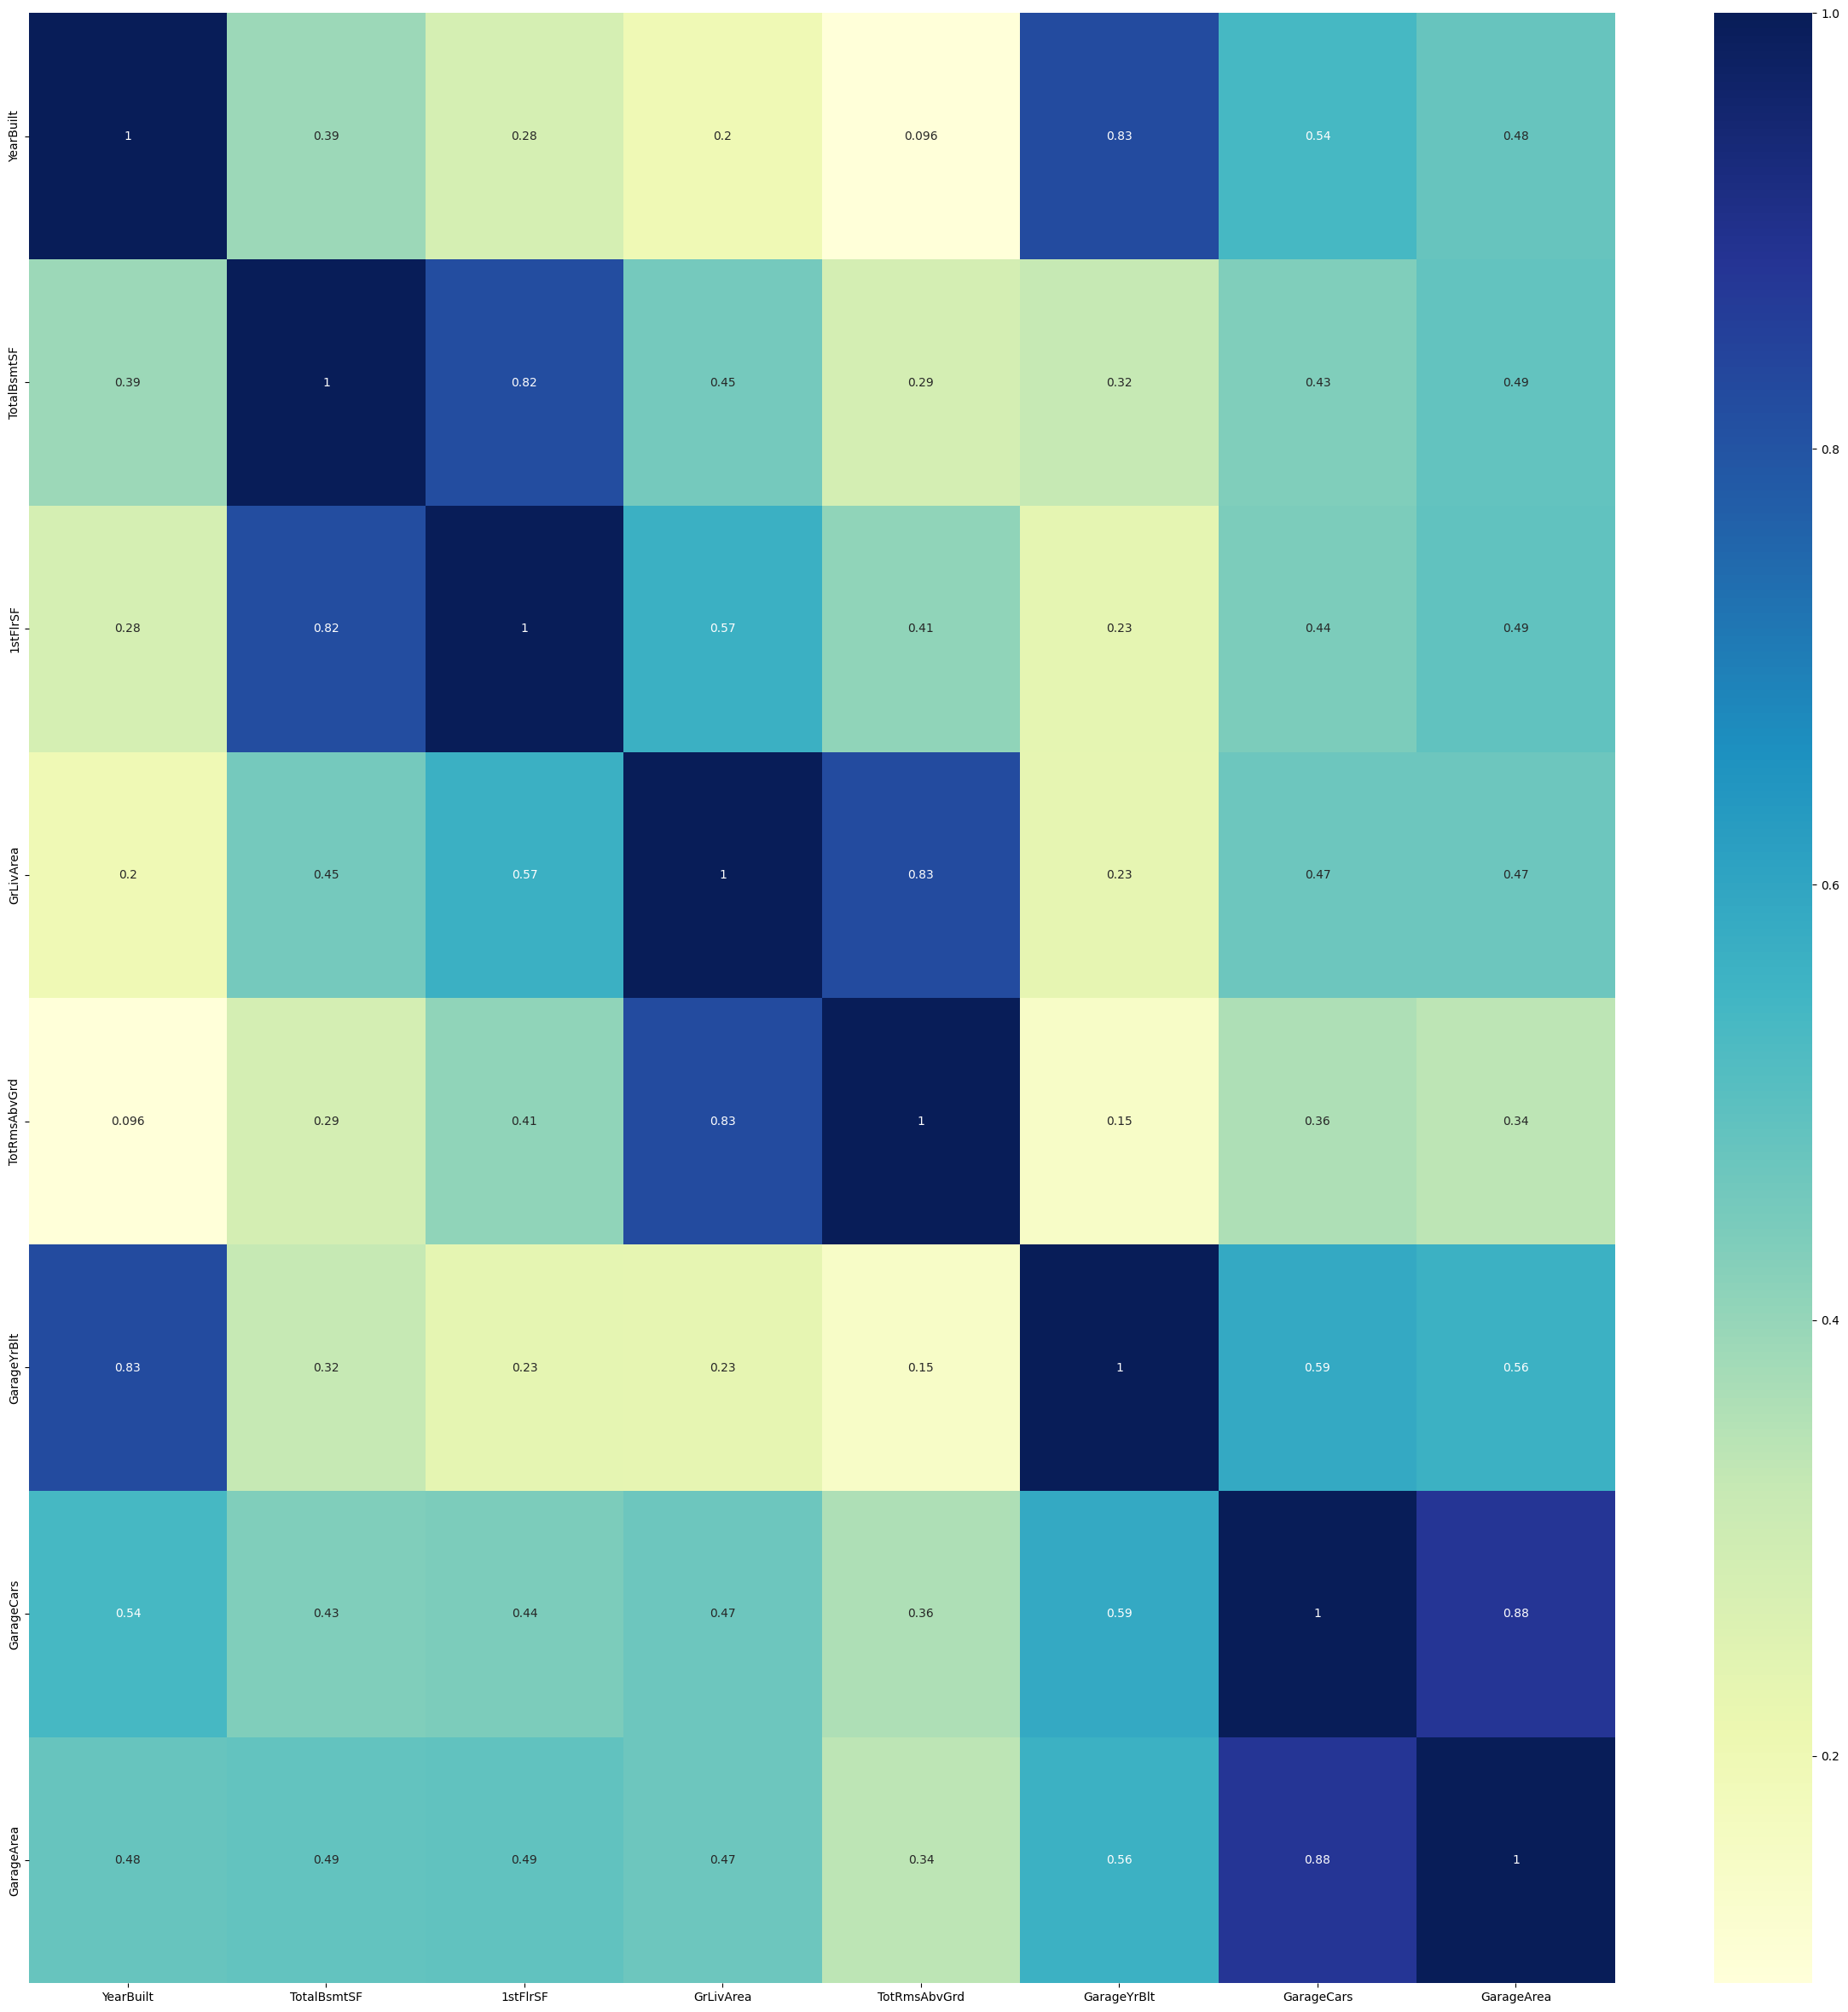

In [ ]:

# plotting highly correlated features in heatmap
import seaborn as sb
plt.figure(figsize=(30, 30));
dataplot = sb.heatmap(df_train[l].corr(), cmap="YlGnBu", annot=True);

# displaying heatmap
plt.show();

In [ ]:
# calculate variance if variance is less than 10 percent than eliminate the columns

df_var = df_train.var()
df_var = pd.DataFrame(df_var)

<ipython-input-37-7e840cb9bf2a>:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_var = df_train.var()


In [ ]:
df_var['Index'] = df_var.index

In [ ]:
df_var

,0,Index
MSSubClass,1.789338e+03,MSSubClass
LotFrontage,5.897492e+02,LotFrontage
LotArea,9.962565e+07,LotArea
OverallQual,1.912679e+00,OverallQual
OverallCond,1.238322e+00,OverallCond
YearBuilt,9.122154e+02,YearBuilt
YearRemodAdd,4.262328e+02,YearRemodAdd
MasVnrArea,3.278497e+04,MasVnrArea
BsmtFinSF1,2.080255e+05,BsmtFinSF1
BsmtFinSF2,2.602391e+04,BsmtFinSF2


In [ ]:
df_var.columns = ["Variance", "Index"]
df_var

,Variance,Index
MSSubClass,1.789338e+03,MSSubClass
LotFrontage,5.897492e+02,LotFrontage
LotArea,9.962565e+07,LotArea
OverallQual,1.912679e+00,OverallQual
OverallCond,1.238322e+00,OverallCond
YearBuilt,9.122154e+02,YearBuilt
YearRemodAdd,4.262328e+02,YearRemodAdd
MasVnrArea,3.278497e+04,MasVnrArea
BsmtFinSF1,2.080255e+05,BsmtFinSF1
BsmtFinSF2,2.602391e+04,BsmtFinSF2


In [ ]:
# identifying the column having less than 10 percent variance
df_var[df_var['Variance'] <= 0.10]

,Variance,Index
BsmtHalfBath,0.057003,BsmtHalfBath
KitchenAbvGr,0.048549,KitchenAbvGr


In [ ]:
df_train.shape

(1460, 75)

In [ ]:
# after dropping theses two columns
df_train.drop(["BsmtHalfBath","KitchenAbvGr"], axis = 1, inplace = True)
df_train.shape

(1460, 73)

In [ ]:
df_train['SalePrice'].nunique()

663

In [ ]:
df_train.shape

(1460, 73)

In [ ]:
df_train = obj_func(df_train)
df_train.shape

(1460, 73)

In [ ]:
# Creating a copy of original data
main_df=df_train.copy()

In [ ]:
columns = df_train.select_dtypes(include = "object").columns.tolist()

In [ ]:
print(len(columns))

38


In [ ]:
test_data = pd.read_csv(path + 'test.csv')
test_data.shape

(1459, 80)

In [ ]:
# after eliminating NA's
test_data = NA_func(test_data)
test_data.shape

(1459, 75)

In [ ]:
test_data = eliminate_identifier(test_data)
test_data.shape

(1459, 74)

In [ ]:
# after dropping theses two columns
test_data.drop(["BsmtHalfBath","KitchenAbvGr"], axis = 1, inplace = True)
test_data.shape

(1459, 72)

In [ ]:
test_data = obj_func(test_data)
test_data.shape

(1459, 72)

In [ ]:
df_final = pd.concat([df_train, test_data], axis=0)
df_final.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,2,1,3,Gd,8,Typ,0,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,2,0,3,TA,6,Typ,1,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,2,1,3,Gd,6,Typ,1,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,1,0,3,Gd,7,Typ,1,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,2,1,4,Gd,9,Typ,1,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [ ]:
df_final.shape

(2919, 73)

In [ ]:
df_final.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [ ]:
df_final=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [ ]:
df_final.shape

(2919, 231)

In [ ]:
df_final =df_final.loc[:,~df_final.columns.duplicated()]

In [ ]:
df_final.shape

(2919, 175)

In [ ]:
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,Fa,Gd,TA,Po,PConc,Slab,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,2,1,3,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,2,0,3,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,2,1,3,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,1,0,3,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,2,1,4,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_Train=df_final.iloc[:1422,:]
df_Test=df_final.iloc[1422:,:]

In [ ]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,Fa,Gd,TA,Po,PConc,Slab,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,2,1,3,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,2,0,3,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,2,1,3,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,1,0,3,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,2,1,4,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,Fa,Gd,TA,Po,PConc,Slab,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1422,120,37.0,4435,6,5,2003,2003,170.0,686.0,0.0,162.0,848.0,848,0,0,848,1.0,1,0,1,3,0,2003.0,2.0,420.0,140,0,0,0,0,0,0,3,2008,136500.0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1423,80,60.0,19690,6,7,1966,1966,0.0,0.0,0.0,697.0,697.0,1575,626,0,2201,0.0,2,0,4,8,1,1966.0,2.0,432.0,586,236,0,0,0,738,0,8,2006,274970.0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1424,20,60.0,9503,5,5,1958,1983,0.0,457.0,374.0,193.0,1024.0,1344,0,0,1344,1.0,1,0,2,6,1,1970.0,1.0,484.0,316,28,0,0,0,0,0,6,2007,144000.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1425,20,80.0,10721,6,6,1959,1959,243.0,0.0,0.0,1252.0,1252.0,1252,0,0,1252,0.0,1,0,3,7,0,1960.0,2.0,528.0,0,39,0,0,0,0,0,10,2008,142000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1426,60,81.0,10944,7,5,1994,1994,448.0,1000.0,0.0,223.0,1223.0,1223,904,0,2127,1.0,2,1,3,5,2,1994.0,2.0,525.0,171,132,0,0,0,0,0,8,2008,271000.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_Train.shape

(1422, 175)

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

<ipython-input-76-8fdc58f80b2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [ ]:
df_num = df_Train.select_dtypes(include = ['int64','float64'])
num_numerical_col = df_num.columns.tolist()

In [ ]:
# before detecting the outliers
df_Train.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
FV               0
RH               0
RL               0
RM               0
Pave             0
IR2              0
IR3              0
Reg              0
HLS              0
Low              0
Lvl              0
NoSeWa           0
CulDSac          0
FR2              0
FR3              0
Inside           0
Mod              0
Sev         

In [ ]:
# detecting outliers from the df_final data frame
for ele in num_numerical_col:
    q75,q25 = np.percentile(df_Train.loc[:,ele],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_Train.loc[df_Train[ele] < min,ele] = np.nan
    df_Train.loc[df_Train[ele] > max,ele] = np.nan

In [ ]:
# after detecting the outliers
df_Train.isna().sum()

MSSubClass       101
LotFrontage      105
LotArea           65
OverallQual        2
OverallCond      123
YearBuilt          7
YearRemodAdd       0
MasVnrArea        96
BsmtFinSF1         7
BsmtFinSF2       161
BsmtUnfSF         29
TotalBsmtSF       61
1stFlrSF          19
2ndFlrSF           2
LowQualFinSF      25
GrLivArea         31
BsmtFullBath       1
FullBath           0
HalfBath           0
BedroomAbvGr      35
TotRmsAbvGrd      29
Fireplaces         5
GarageYrBlt        1
GarageCars         5
GarageArea        21
WoodDeckSF        29
OpenPorchSF       76
EnclosedPorch    202
3SsnPorch         23
ScreenPorch      115
PoolArea           6
MiscVal           51
MoSold             0
YrSold             0
SalePrice         60
FV                 0
RH                 0
RL                 0
RM                 0
Pave               0
IR2                0
IR3                0
Reg                0
HLS                0
Low                0
Lvl                0
NoSeWa             0
CulDSac      

In [ ]:
# after filling the values with mean in the outliers
df_Train = mean_func(df_Train)
df_Train.isna().sum()

<ipython-input-3-17cdbcc7af57>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ele] = df[ele].fillna(df[ele].mean())


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
FV               0
RH               0
RL               0
RM               0
Pave             0
IR2              0
IR3              0
Reg              0
HLS              0
Low              0
Lvl              0
NoSeWa           0
CulDSac          0
FR2              0
FR3              0
Inside           0
Mod              0
Sev         

# Building the Model

In [ ]:
X = df_Train.drop("SalePrice", axis = 1)
y = df_Train['SalePrice']

In [ ]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(952, 174) (470, 174) (952,) (470,)


In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor as RF

# create regressor object
regressor_random = RF(n_estimators = 100, random_state = 0)

In [ ]:
model , predictions = model_handler_train(regressor_random, X_train, y_train)

R squared: 96.29
Mean Absolute Error: 7543.02466104284
Mean Square Error: 122306173.26982123
Root Mean Square Error: 11059.212145077117


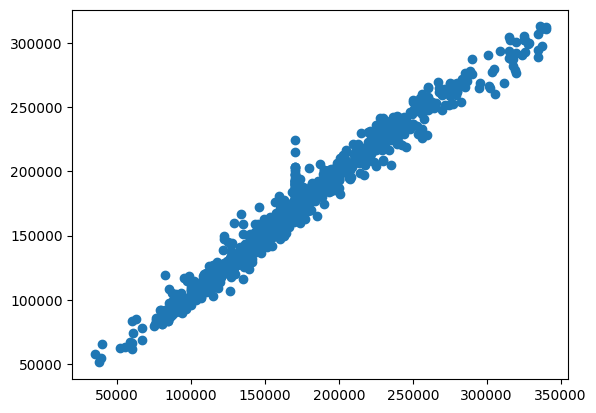

In [ ]:
plt.scatter(y_train , predictions)

In [ ]:
pred_test = model.predict(X_test)

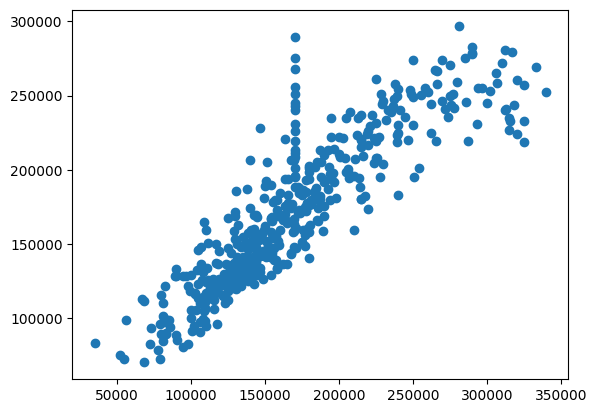

In [ ]:
plt.scatter(y_test , pred_test)

In [ ]:
print('R squared: {:.2f}'.format(model.score(X_test,y_test)*100))

R squared: 78.06


# Randomized search CV for Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 43, 76, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 5],
 'n_estimators': [200, 1100, 2000]}


In [ ]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU times: user 8.44 s, sys: 469 ms, total: 8.9 s
Wall time: 3min 1s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 43, 76, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [200, 1100, 2000]},
                   random_state=42, verbose=2)

In [ ]:
print(rf_random.best_params_)

{'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [ ]:
best_random = rf_random.best_estimator_
model , predictions = model_handler_train(best_random, X_train, y_train)

R squared: 99.12
Mean Absolute Error: 3640.662927035285
Mean Square Error: 29013112.183629766
Root Mean Square Error: 5386.38210523815


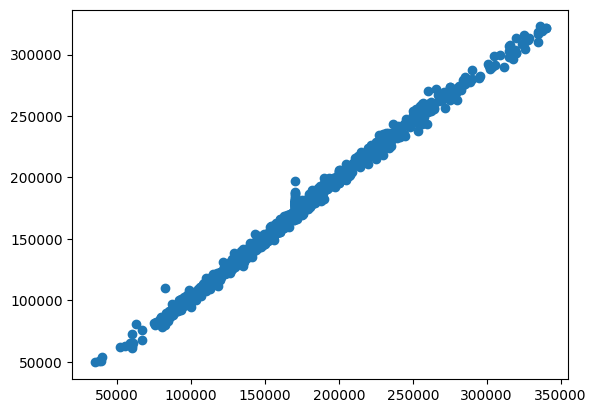

In [ ]:
plt.scatter(y_train , predictions)

In [ ]:
pred_test = model.predict(X_test)

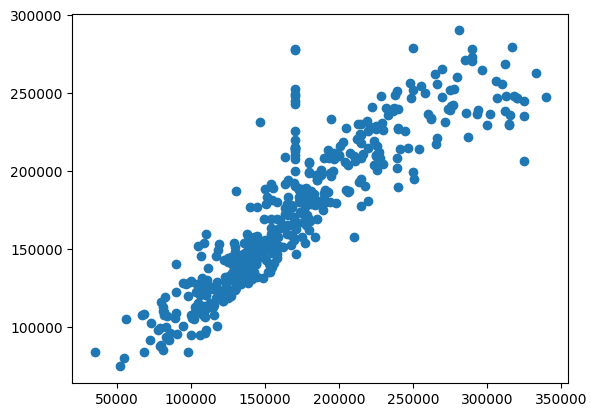

In [ ]:
plt.scatter(y_test , pred_test)

In [ ]:
print('R squared: {:.2f}'.format(model.score(X_test,y_test)*100))

R squared: 79.54


# XGBRegressor

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [ ]:
model , predictions = model_handler_train(xgb, X_train, y_train)

In [ ]:
plt.scatter(y_train , predictions)

In [ ]:
pred_test = model.predict(X_test)

In [ ]:
plt.scatter(y_test , pred_test)

In [ ]:
print('R squared: {:.2f}'.format(model.score(X_test,y_test)*100))

# Hyperparameter tuning in XGBRegression

In [ ]:
regressor = XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=None, max_depth=None,
             min_child_weight=None, monotone_constraints=None,
             n_estimators=500, n_jobs=16, num_parallel_tree=None,
             random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
             subsample=None, tree_method=None, validate_parameters=1,
             verbosity=None)

In [ ]:
model , predictions = model_handler_train(regressor, X_train, y_train)

In [ ]:
plt.scatter(y_train , predictions)

In [ ]:
pred_test = model.predict(X_test)

In [ ]:
plt.scatter(y_test , pred_test)

In [ ]:
print('R squared: {:.2f}'.format(model.score(X_test,y_test)*100))

# PCA

In [ ]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
rescaled_data = sc.fit_transform(X)

In [ ]:
rescaled_data.shape

In [ ]:
rescaled_data[:5]

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# Selecting number of features from the given plot
pca = PCA().fit(rescaled_data)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, df_Train.shape[1], step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
pca = PCA(n_components = 10)
x_pca = pca.fit_transform(rescaled_data)

In [ ]:
x_pca.shape

In [ ]:
# split a dataset into train and test sets
from sklearn.model_selection import train_test_split
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
# applying random forest regression in pca data
best_random = rf_random.best_estimator_
model , predictions = model_handler_train(best_random, X_train, y_train)

In [ ]:
plt.scatter(y_train , predictions)

In [ ]:
pred_test = model.predict(X_test)

In [ ]:
plt.scatter(y_test , pred_test)

In [ ]:
print('R squared: {:.2f}'.format(model.score(X_test,y_test)*100))

In [ ]:
# pca = PCA(n_components = 10)
# df_Test = pca.fit_transform(df_Test)

In [ ]:
y_test=model.predict(df_Test)